# Starting A Career in ASEAN. Which country will you go?

# 1. What is ASEAN?

Quoting from wikipedia article https://en.wikipedia.org/wiki/Association_of_Southeast_Asian_Nations:

*"The Association of Southeast Asian Nations is a regional intergovernmental organization comprising ten countries in Southeast Asia, which promotes intergovernmental cooperation and facilitates economic, political, security, military, educational, and sociocultural integration among its members and other countries in Asia. It also regularly engages other countries in the Asia-Pacific region and beyond."*

# 2. Why do you care?

Let's say you are a young graduate from university. Having completed the Applied Data Science course from University of Michigan, you feel empowered with your newly acquired knowledge and you are aspired to start a career as a data scientist. 

However, you are unsure which country you would like to go. Browsing through Wikipedia article, you are intrigued in the ASEAN countries. However, you are unsure which country you should be starting your career at.

After much consideration, you decided that you would like to **start your career in the country that potentially give you the highest starting salary.**

It makes sense to find out which country is the richest in order to increase your probability to get a high starting salary.

# 3. Which of the ASEAN country is the richest?

You know there are a plenty of data from World Bank (https://data.worldbank.org). You start your research by taking a look at an economic indicator called Gross National Income (GNI), reflecting the total domestic and foreign output claimed by residents of a country, consisting of gross domestic product (GDP), plus factor incomes earned by foreign residents, minus income earned in the domestic economy by nonresidents (Todaro & Smith, 2011: 44). https://en.wikipedia.org/wiki/Gross_national_income

To ensure these data can work nicely with Pandas, you perform manual cleaning by removing all unnecessary components and leaving the main tables alone. You push them into your own repository.

You can then begin your data analysis and plotting some charts

## 3.1. Import necessary Python packages

In [1]:
import numpy as np
import pandas as pd

import csv
import requests

import matplotlib.pyplot as plt

## 3.2. Read Datasets

In [2]:
# df_GNI = pd.read_csv("gnp.csv")

GNI_url = 'https://raw.githubusercontent.com/andriyantohalim/AppliedDataScienceMichigan/master/gnp.csv'
r = requests.Session().get(GNI_url)

with open('gnp_1.csv', 'w') as f:
    writer = csv.writer(f)
    reader = csv.reader(r.content.decode('utf-8').splitlines())

    for row in reader:
        writer.writerow(row)
        
df_GNI = pd.read_csv("gnp_1.csv")

In [3]:
df_GNI.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.411359e+09,2.274836e+09,2.290680e+09,2.412460e+09,2.473122e+09,2.542891e+09,2.481324e+09,2.469662e+09,2.490319e+09,NaN
1,Afghanistan,AFG,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.265273e+10,1.487248e+10,1.607712e+10,1.955314e+10,2.121613e+10,2.110937e+10,2.058340e+10,1.989395e+10,1.976360e+10,NaN
2,Angola,AGO,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.127345e+10,7.576353e+10,8.274547e+10,1.048046e+11,1.244187e+11,1.349351e+11,1.259152e+11,1.087267e+11,1.061889e+11,NaN
3,Albania,ALB,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.252907e+10,1.270949e+10,1.280449e+10,1.265873e+10,1.315670e+10,1.311522e+10,1.263642e+10,1.243126e+10,1.241526e+10,NaN
4,Andorra,AND,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##  3.3. Browse through Datasets

Make sure all the data needed are available

In [4]:
ASEAN = ["Singapore", "Brunei", "Malaysia", "Thailand", "Philippines", "Indonesia", "Vietnam", "Lao", "Cambodia", "Myanmar"]

In [5]:
for country in ASEAN:
    idx = np.where(df_GNI['Country Name'].str.contains(country))
    print(df_GNI.loc[idx]["Country Name"])

206    Singapore
Name: Country Name, dtype: object
29    Brunei Darussalam
Name: Country Name, dtype: object
167    Malaysia
Name: Country Name, dtype: object
231    Thailand
Name: Country Name, dtype: object
185    Philippines
Name: Country Name, dtype: object
104    Indonesia
Name: Country Name, dtype: object
255    Vietnam
Name: Country Name, dtype: object
127    Lao PDR
Name: Country Name, dtype: object
121    Cambodia
Name: Country Name, dtype: object
158    Myanmar
Name: Country Name, dtype: object


Due to World Bank's country naming, you need to make the following changes to ASEAN list
* "Brunei" to **"Brunei Darussalam"**
* "Lao" to **"Lao PDR"**

In [6]:
ASEAN = ["Singapore", "Brunei Darussalam", "Malaysia", "Thailand", "Philippines", "Indonesia", "Vietnam", "Lao PDR", "Cambodia", "Myanmar"]

# 3.3. Extract Relevant Data

### 3.3.1. Set "Country Name" as index

In [7]:
df_GNI.set_index("Country Name", inplace=True)
df_GNI.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.411359e+09,2.274836e+09,2.290680e+09,2.412460e+09,2.473122e+09,2.542891e+09,2.481324e+09,2.469662e+09,2.490319e+09,NaN
Afghanistan,AFG,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.265273e+10,1.487248e+10,1.607712e+10,1.955314e+10,2.121613e+10,2.110937e+10,2.058340e+10,1.989395e+10,1.976360e+10,NaN
Angola,AGO,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.127345e+10,7.576353e+10,8.274547e+10,1.048046e+11,1.244187e+11,1.349351e+11,1.259152e+11,1.087267e+11,1.061889e+11,NaN
Albania,ALB,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.252907e+10,1.270949e+10,1.280449e+10,1.265873e+10,1.315670e+10,1.311522e+10,1.263642e+10,1.243126e+10,1.241526e+10,NaN
Andorra,AND,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.3.2. Create a new GNI dataframe only for ASEAN countries

In [8]:
df_GNI_ASEAN = pd.DataFrame([df_GNI.loc[country] for country in ASEAN])

In [9]:
df_GNI_ASEAN.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Singapore,SGP,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,NaN,NaN,8.509598e+08,9.456925e+08,9.266117e+08,1.016550e+09,1.149154e+09,...,1.849172e+11,2.273768e+11,2.504248e+11,2.715129e+11,2.955005e+11,3.083401e+11,2.989956e+11,2.935238e+11,3.060477e+11,NaN
Brunei Darussalam,BRN,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.246052e+10,1.294264e+10,1.398379e+10,1.690656e+10,1.832923e+10,1.767534e+10,1.611124e+10,1.392016e+10,1.268764e+10,NaN
Malaysia,MYS,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,NaN,NaN,2.056609e+09,2.252861e+09,2.484368e+09,2.873130e+09,3.147398e+09,...,2.108409e+11,2.329454e+11,2.593230e+11,2.959845e+11,3.195439e+11,3.326953e+11,3.211230e+11,3.076416e+11,3.052126e+11,NaN
Thailand,THA,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,NaN,NaN,3.282279e+09,3.595889e+09,3.882772e+09,4.324261e+09,5.084449e+09,...,2.766526e+11,3.080100e+11,3.342558e+11,3.747262e+11,3.899962e+11,3.942959e+11,3.918106e+11,3.922747e+11,4.105296e+11,NaN
Philippines,PHL,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,NaN,NaN,6.139537e+09,5.608124e+09,5.119025e+09,5.643905e+09,6.228947e+09,...,2.084960e+11,2.316190e+11,2.491525e+11,2.882786e+11,3.254764e+11,3.472418e+11,3.579384e+11,3.698693e+11,3.835086e+11,NaN


## 3.4. ASEAN Gross National Income in 2017

Since the data are all looks good, now let's see which country is the richest in 2017

In [10]:
df_GNI_ASEAN["2017"].sort_values(ascending=False)

Indonesia            9.343653e+11
Thailand             4.105296e+11
Philippines          3.835086e+11
Singapore            3.060477e+11
Malaysia             3.052126e+11
Vietnam              2.067171e+11
Myanmar              6.468670e+10
Cambodia             1.975926e+10
Lao PDR              1.559524e+10
Brunei Darussalam    1.268764e+10
Name: 2017, dtype: float64

You get ready to pack your bags to **INDONESIA** but when you see the map, you realize that Indonesia is the largest country in ASEAN. 

*(The map below is referenced from https://aseanup.com/free-maps-asean-southeast-asia/)*

<img src="https://aseanup.com/wp-content/uploads/2016/11/ASEAN-map.jpg">


You soon realized that: 
* **Some countries may have more natural resources than the others**
* **POPULATION of each country may be of different size**

These two factors alone may contribute to the GNI numbers differently accross different countries

## 3.5. ASEAN Population in 2017

So you decided to put your bags aside and continue your investigation.

In [11]:
# df_POP = pd.read_csv("pop.csv")

POP_url = 'https://raw.githubusercontent.com/andriyantohalim/AppliedDataScienceMichigan/master/pop.csv'
r = requests.Session().get(POP_url)

with open('pop_1.csv', 'w') as f:
    writer = csv.writer(f)
    reader = csv.reader(r.content.decode('utf-8').splitlines())

    for row in reader:
        writer.writerow(row)
        
df_POP = pd.read_csv("pop_1.csv")

In [12]:
df_POP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


### 3.5.1. Set "Country Name" as index

In [13]:
df_POP.set_index("Country Name", inplace=True)
df_POP.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


### 3.5.2. Create a new POPULATION dataframe only for ASEAN countries

In [14]:
df_POP_ASEAN = pd.DataFrame([df_POP.loc[country] for country in ASEAN])

In [15]:
df_POP_ASEAN

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Singapore,SGP,"Population, total",SP.POP.TOTL,1646400.0,1702400.0,1750200.0,1795000.0,1841600.0,1886900.0,1934400.0,...,4987573.0,5076732.0,5183688.0,5312437.0,5399162.0,5469724.0,5535002.0,5607283.0,5612253.0,NaN
Brunei Darussalam,BRN,"Population, total",SP.POP.TOTL,81745.0,85596.0,89516.0,93576.0,97848.0,102425.0,107316.0,...,383772.0,388662.0,394013.0,399748.0,405716.0,411704.0,417542.0,423196.0,428697.0,NaN
Malaysia,MYS,"Population, total",SP.POP.TOTL,8157106.0,8418460.0,8692815.0,8974084.0,9253963.0,9526563.0,9789982.0,...,27605383.0,28112289.0,28635128.0,29170456.0,29706724.0,30228017.0,30723155.0,31187265.0,31624264.0,NaN
Thailand,THA,"Population, total",SP.POP.TOTL,27397175.0,28224204.0,29081034.0,29967041.0,30881332.0,31822796.0,32789096.0,...,66881867.0,67208808.0,67530130.0,67843979.0,68143065.0,68416772.0,68657600.0,68863514.0,69037513.0,NaN
Philippines,PHL,"Population, total",SP.POP.TOTL,26273025.0,27164617.0,28081231.0,29016771.0,29962876.0,30913933.0,31867563.0,...,92220879.0,93726624.0,95277940.0,96866642.0,98481032.0,100102249.0,101716359.0,103320222.0,104918090.0,NaN
Indonesia,IDN,"Population, total",SP.POP.TOTL,87792515.0,90138235.0,92558005.0,95055665.0,97638029.0,100308894.0,103067354.0,...,239340478.0,242524123.0,245707511.0,248883232.0,252032263.0,255131116.0,258162113.0,261115456.0,263991379.0,NaN
Vietnam,VNM,"Population, total",SP.POP.TOTL,32670629.0,33666772.0,34684165.0,35722091.0,36780985.0,37860012.0,38959334.0,...,87565407.0,88472512.0,89436644.0,90451881.0,91497725.0,92544915.0,93571567.0,94569072.0,95540800.0,NaN
Lao PDR,LAO,"Population, total",SP.POP.TOTL,2120896.0,2170343.0,2221122.0,2273349.0,2327137.0,2382594.0,2439196.0,...,6152036.0,6246274.0,6333487.0,6415169.0,6494557.0,6576397.0,6663967.0,6758353.0,6858160.0,NaN
Cambodia,KHM,"Population, total",SP.POP.TOTL,5722370.0,5873015.0,6028551.0,6183747.0,6331583.0,6467197.0,6584766.0,...,14090208.0,14308740.0,14537886.0,14776866.0,15022692.0,15270790.0,15517635.0,15762370.0,16005373.0,NaN
Myanmar,MMR,"Population, total",SP.POP.TOTL,20986123.0,21438025.0,21898020.0,22371902.0,22867741.0,23391145.0,23944178.0,...,49800690.0,50155896.0,50553031.0,50986514.0,51448196.0,51924182.0,52403669.0,52885223.0,53370609.0,NaN


### 3.5.4. Sort POPULATION dataframe values from highest to lowest

In [16]:
df_POP_ASEAN["2017"].sort_values(ascending=False)

Indonesia            263991379.0
Philippines          104918090.0
Vietnam               95540800.0
Thailand              69037513.0
Myanmar               53370609.0
Malaysia              31624264.0
Cambodia              16005373.0
Lao PDR                6858160.0
Singapore              5612253.0
Brunei Darussalam       428697.0
Name: 2017, dtype: float64

AHA! Your suspicion is correct. Indonesia has the highest population among all other countries!! **You need to dig deeper and find a better measure!**

# 4. Gross National Income (GNI) per Capita

In order to measure a standard of living of each country, you then decided to use "GNI per Capita", i.e. __the dollar value of a country’s final income in a year, divided by its population. It reflects the average income of a country’s citizens.__

\begin{equation*}
GNI per Capita = 
\frac{Gross National Income (GNI)}{Population}
\end{equation*}

You can find out from Wikipedia (https://en.wikipedia.org/wiki/List_of_countries_by_GNI_(nominal)_per_capita) or any other websites but because now you are a Data Scientist, you decided to perform "**Feature engineering"**, i.e. calculate the GNI per Capita yourself!

## 4.1. Calculate GNI per Capita from 2007 to 2017

In [17]:
df_GNIperCap_ASEAN = pd.DataFrame(df_GNI_ASEAN.loc[:, "2007":"2017"]/df_POP_ASEAN.loc[:, "2007":"2017"])

df_GNIperCap_ASEAN

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Singapore,35656.076371,36678.477306,37075.577783,44788.026904,48310.151326,51108.915485,54730.808934,56372.140597,54019.055614,52346.891842,54532.049952
Brunei Darussalam,30933.752083,34163.601043,32468.538084,33300.509048,35490.673404,42293.037999,45177.496146,42932.149783,38585.908286,32892.926984,29595.815730
Malaysia,6649.749386,7548.086915,7637.673871,8286.246513,9056.114651,10146.722476,10756.618625,11006.189375,10452.150178,9864.335074,9651.216624
Thailand,3524.666307,3966.086637,4136.436517,4582.882074,4949.728145,5523.352749,5723.196527,5763.147135,5706.732564,5696.407720,5946.471241
Philippines,1768.639514,2063.843203,2260.832654,2471.219140,2615.007716,2976.036148,3304.964990,3468.871487,3518.985908,3579.834068,3655.313944
Indonesia,1596.249896,1935.516943,2143.247153,2524.506874,3002.419485,3573.075315,3728.707643,3617.730927,3434.072835,3410.821041,3539.378026
Vietnam,833.408964,979.542811,1008.258336,1246.738868,1364.461260,1526.631879,1707.902038,1862.431461,1950.305019,2057.787329,2163.652978
Lao PDR,615.367200,752.343268,893.421072,999.472751,1146.856446,1375.502649,1621.694480,1840.607338,1997.268676,2147.917512,2273.968767
Cambodia,588.633972,668.369239,696.842484,747.895225,811.017022,881.788860,967.812289,1019.794645,1061.075958,1135.845170,1234.538985
Myanmar,356.779957,478.240637,647.319579,855.795616,1016.498497,1144.422059,1227.997968,1240.177964,1205.230960,1204.908904,1212.028472


This data looks good. Next, you want to find a country with the highest GNI per Capita. 

## 4.2. Sort the GNI per Capita from highest to the lowest

As a simple test, you sort out the calculated GNI per capita using values from Year 2017 only.

In [18]:
df_GNIperCap_ASEAN["2017"].sort_values(ascending=False)

Singapore            54532.049952
Brunei Darussalam    29595.815730
Malaysia              9651.216624
Thailand              5946.471241
Philippines           3655.313944
Indonesia             3539.378026
Lao PDR               2273.968767
Vietnam               2163.652978
Cambodia              1234.538985
Myanmar               1212.028472
Name: 2017, dtype: float64

OH WOW! What a surprise. **SINGAPORE** has the highest GNI per capita in 2017 among all other ASEAN countries

## 4.3. Plot a Bar Chart showing ASEAN GNI per Capita in 2017

To better visualize what's going on, you plot a bar chart:

Text(0,0.5,'GNI per Capita (USD)')

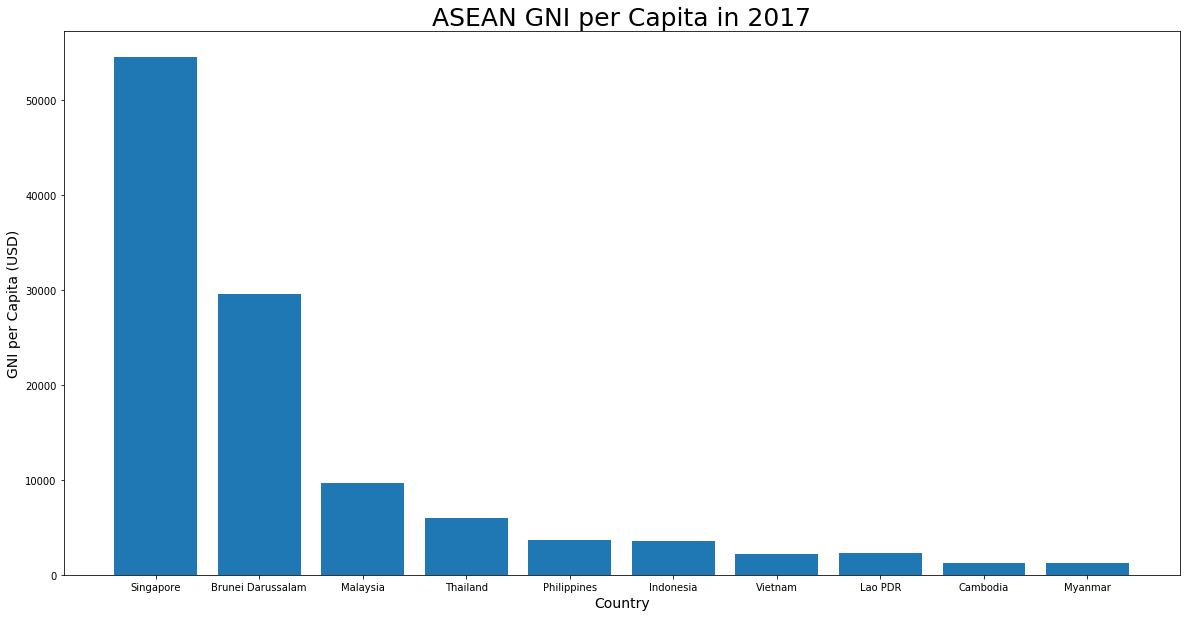

In [27]:
plt.figure(figsize=(20,10))

plt.title("ASEAN GNI per Capita in 2017", {'fontsize' : 25})
plt.bar(df_GNIperCap_ASEAN.index, df_GNIperCap_ASEAN.loc[:, "2017"])
plt.xlabel("Country", fontsize=14)
plt.ylabel("GNI per Capita (USD)", fontsize=14)

**That is a pretty huge difference!**

Singapore's 2017 GNI per capita comes at the 1st place with **USD54,532.05** while the 2nd place is Brunei with **USD29,595.82**.

## 4.4. Plot ASEAN's GNI per Capita from 2007 to 2017

To make sure you are not seeing some crazy data here, you plot the whole GNI per capita of the whole ASEAN country.

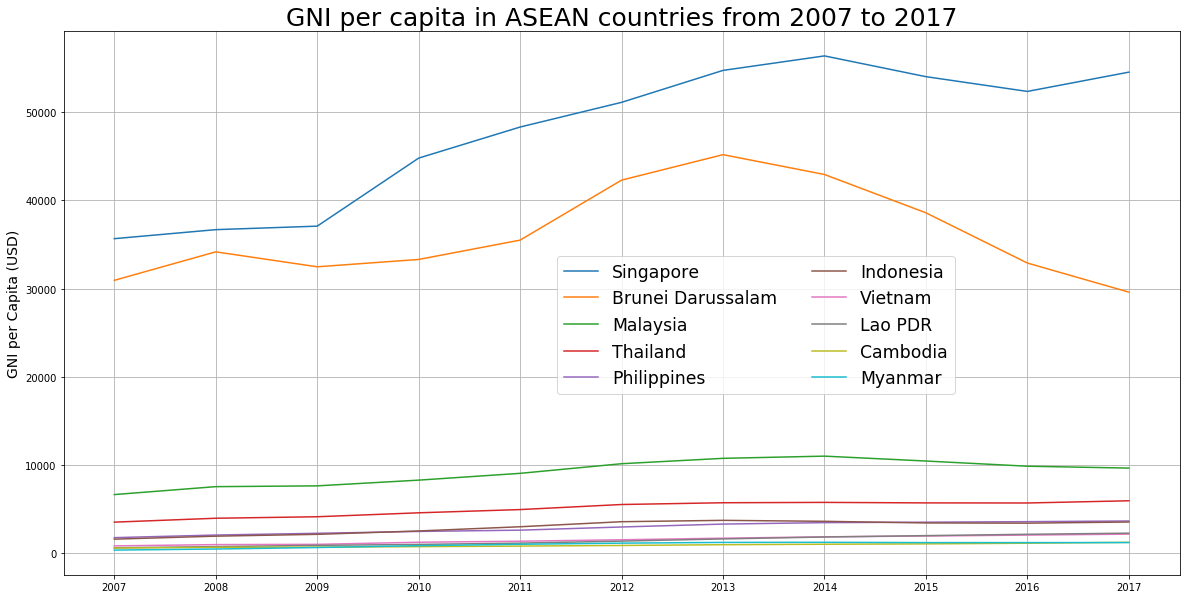

In [28]:
plt.figure(figsize=(20,10))
plt.title("GNI per capita in ASEAN countries from 2007 to 2017", {'fontsize' : 25})
plt.ylabel("GNI per Capita (USD)", fontsize=14)

for country in ASEAN:
    plt.plot(df_GNIperCap_ASEAN.loc[country].index, df_GNIperCap_ASEAN.loc[country])

plt.legend(loc='best', borderaxespad=13,  ncol=2, fontsize='xx-large', frameon=True)
plt.grid(True)

## 5. Discussion

You learn a couple of points from this exercise:

* It is interesting to see an irony here: although Singapore's territorial size is the smallest, it has the highest GNI per capita among all other ASEAN countries.
* Singapore GNI per Capita in 2017 is **USD54,532.05** while Brunei is at **USD29,595.82**. That is 1.8 times (almost double) difference and therefore, you decided not to consider working at Brunei at all.
* Singapore shows an upward trend in GNI per capita, i.e. standard of living gets better as the year goes by while Brunei shows a downward trend.

You decided to pack your bag and bought a one way ticket to Singapore to embark on your first career.

## 6. References

Data are taken from World Bank:
* GNI data : https://data.worldbank.org/indicator/NY.GNP.ATLS.CD
* Population : https://data.worldbank.org/indicator/SP.POP.TOTL

Cleaned data are available from my repo:
* GNI: https://github.com/andriyantohalim/AppliedDataScienceMichigan/blob/master/gnp.csv
* Population: https://github.com/andriyantohalim/AppliedDataScienceMichigan/blob/master/pop.csv